# **TUTORIAL 6**
# Distance Based Classification

In pattern recognition, the k-nearest neighbors algorithm is a non-parametric method used for classification and regression.It belongs to the supervised learning domain.

We will understand it with a practice example, Steps we are going to follow are :

1) Import important libraries

2) Importing Data

3) Encoding

4)Training and Test Data

5) Visualization of Data

6) Nearest Neighbour Classifier

7) k Nearest Neighbour

8) Nearest Mean Classifier

9) Compare Results

10) sklearn Library

---



---



**1) Importing important libraries**

In [333]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import json

**2) Importing Data**

We will be working on the Iris dataset today.

In [334]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Species']=data.target

In [335]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


We will be taking 2 features, 'SepalLengthCm' and 'PetalWidthCm' for classification for easier visualization.

In [336]:
# Write the code to choose columns 'SepalLengthCm', 'PetalWidthCm' and 'Species' from the dataframe 'df',
# Make a new dataframe 'df_new' and assign the three columns to the new dataframe.

In [337]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [338]:
#Write the code below
df_new=df[['sepal length (cm)','petal width (cm)','Species']]


In [339]:
df_new.head()

,sepal length (cm),petal width (cm),Species
0,5.1,0.2,0
1,4.9,0.2,0
2,4.7,0.2,0
3,4.6,0.2,0
4,5.0,0.2,0


**3) Encoding**

Now we will use Label Encoder to Encode the 'Species' column in numeric. For eg - the species Iris-setosa is encoded as 0, Iris-virginica as 2 and so on.

In [340]:
# Do not make changes in this cell
# Simply execute it and move on
from sklearn.preprocessing import LabelEncoder
labelencoder_Species = LabelEncoder()
df_new['Species_encoded'] = labelencoder_Species.fit_transform(df_new['Species'])
df_new

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sepal length (cm),petal width (cm),Species,Species_encoded
0,5.1,0.2,0,0
1,4.9,0.2,0,0
2,4.7,0.2,0,0
3,4.6,0.2,0,0
4,5.0,0.2,0,0
...,...,...,...,...
145,6.7,2.3,2,2
146,6.3,1.9,2,2
147,6.5,2.0,2,2
148,6.2,2.3,2,2


We break this into X (features - 'SepalLengthCm' and 'PetalWidthCm') and y (output which is 'Species_encoded').

In [341]:
# a)Write the code to choose columns 'SepalLengthCm' and 'PetalWidthCm' from the dataframe 'df_new',
# and assign it to the new dataframe X.
# b)Write the code to choose columns 'Species_encoded' from the dataframe 'df_new',
# and assign it to the new dataframe y.

In [342]:
#Write the code below
X=df_new[['sepal length (cm)','petal width (cm)']]
y=df_new[['Species_encoded']]


**4) Training and Test data**

We will divide the dataset into training and test dataset to see the accuracy of each of the algorithms that we use :

In [343]:
from sklearn.model_selection import train_test_split

In [344]:
# Split the dataset into 60% training and 40% test set
# NOTE:- take random_state = 3
# Take the variables as X_train, X_test, y_train and y_test

In [345]:
#Write the code below
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=3)


We can check the different types of species in the dataset using the unique function :

In [346]:
df_new['Species'].unique()

array([0, 1, 2])

**5) Visualization of data**

Now we will plot the two features on the x and y axis and plot the data with different colour according to the species. 

In [347]:
# Write the code to create datasets according to the different categories of the species from the training set of features
# and assign it to the new dataframes setosa, versicolor and versicolor.

In [348]:
#Create datasets according to the category
#For the species setosa           
setosa=X_train[y_train['Species_encoded']==0]
#For the species versicolor          
versicolor=X_train[y_train['Species_encoded']==1]
#For the species virginica   
virginica=X_train[y_train['Species_encoded']==2]

Text(0.5, 1.0, 'Different Species Visualization')

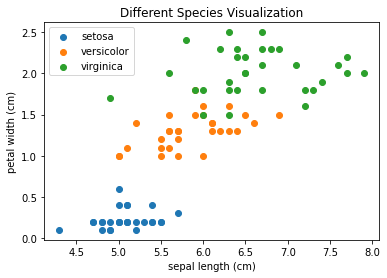

In [349]:
#Plot the data categorywise using scatter plot and visualize the data. Also include labels and legend.
#Write the code below
plt.scatter(setosa['sepal length (cm)'], setosa['petal width (cm)'], label='setosa')
plt.scatter(versicolor['sepal length (cm)'], versicolor['petal width (cm)'], label='versicolor')
plt.scatter(virginica['sepal length (cm)'], virginica['petal width (cm)'], label='virginica')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.title('Different Species Visualization')

Let us import the time library to compare the timing of the 3 methods :

In [350]:
import time
from math import sqrt

**6) Nearest Neighbour Classifier**



In [351]:
# Question 1) Write the algorithm for nearest neighbour classifier as learnt in the theory
#             Assign the answer to ans[0] after converting the output of the method to tuple 

In [352]:
# Algorithm - Calculate the Euclidian distance for each test dataset by comparing with every trainig dataset and assign it to the variable 'val'
#            The prediciton is the minimum value obtained from all the Euclidian distance calculated for that test datapoint
# Assign the y_predict to ans[0] as a tuple => (0,1,0,2, and so on) 

In [353]:
ans = [0] * 10
start_time = time.time()                          # Starting the runtime for this cell
y_predict = []                                    # Predicted values of y will be stored
#Write the code below
def euclidean_distance(x_test, x_train):
    distance = 0
    for i in range(len(x_test)-1):
        distance += (x_test[i]-x_train[i])**2
    return sqrt(distance)

def get_neighbors(x_test, x_train, num_neighbors):
    distances = []
    data = []
    for i in x_train:
        distances.append(euclidean_distance(x_test,i))
        data.append(i)
    distances = np.array(distances)
    data = np.array(data)
    sort_indexes = distances.argsort()
    data = data[sort_indexes]
    return data[:num_neighbors]

def prediction(x_test, x_train, num_neighbors):
    classes = []
    neighbors = get_neighbors(x_test, x_train, num_neighbors)
    for i in neighbors:
        classes.append(i[-1])
    predicted = max(classes, key=classes.count) #taking the most repeated class
    return predicted

tr = X_train
ts = X_test
tr['Species_encoded'] = y_train['Species_encoded']
ts['Species_encoded'] = y_test['Species_encoded']
train = tr.values
test = ts.values
for i in test:
    y_predict.append(int(prediction(i, train, 1)))
# 1 mark
ans[0] = tuple(y_predict)
ans[0] = str(ans[0])
time_NN = time.time() - start_time                # Final time taken

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


We will concatenate the columns of predicted and y_test dataframe to X_test

In [354]:
# a)Concatenate X_test and y_test dataframe by column and assign it to the new dataframe 'Test_Data'
# b)Concatenate Test_data and Predicted dataframe by column assign it to the new dataframe 'Check_Prediction' 

In [355]:
#Write the code below
Test_data=X_test.reset_index()
y_predict = pd.DataFrame(y_predict,columns =['Prediction'])
Check_Prediction=pd.concat([Test_data,y_predict],axis=1)

We will calculate the accuracy now :

In [356]:
# Question 2) Calculate the accuracy obtained for the algorithm used above
#             Assign the accuracy to ans[1] and store it as 'Accuracy_NearestNeighbours'  

In [357]:
#NOTE - Accuracy = Correct_Predictions/Total_Predictions
#Write the code below
correct=sum(Check_Prediction['Species_encoded']==Check_Prediction['Prediction'])
total=len(Check_Prediction['Species_encoded'])
Accuracy=correct/total
Accuracy_NearestNeighbours=Accuracy
# 1 mark
ans[1] = Accuracy
Accuracy_NearestNeighbours

0.9

Now let us have a look at the values that we did not predicted correctly :

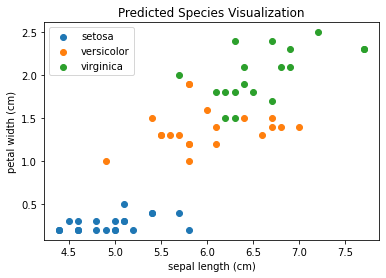

<Figure size 432x288 with 0 Axes>

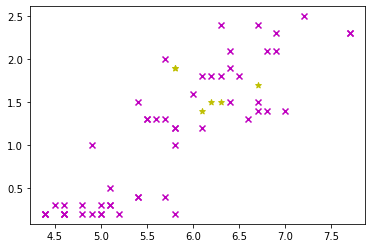

In [358]:
#Plot the data categorywise using scatter plot and visualize the data. Also include labels and legend.
#Write the code below
Check_Prediction = Check_Prediction.rename(columns = {'sepal length (cm)' : 'SepalLengthCm','petal width (cm)' : 'PetalWidthCm' })
plt.figure()
setosa1 = Check_Prediction[Check_Prediction['Prediction']==0]
versicolor1 = Check_Prediction[Check_Prediction['Prediction']==1]
virginica1 = Check_Prediction[Check_Prediction['Prediction']==2]
plt.scatter(setosa1['SepalLengthCm'], setosa1['PetalWidthCm'], label='setosa')
plt.scatter(versicolor1['SepalLengthCm'], versicolor1['PetalWidthCm'], label='versicolor')
plt.scatter(virginica1['SepalLengthCm'], virginica1['PetalWidthCm'], label='virginica')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.title('Predicted Species Visualization')
plt.show()
plt.clf()
plt.figure()
#Implement the below code snippet to see the values that were not predicted correctly
for index in Check_Prediction.index:
    if(Check_Prediction['Species_encoded'][index]==Check_Prediction['Prediction'][index]):
        plt.scatter(Check_Prediction['SepalLengthCm'][index],Check_Prediction['PetalWidthCm'][index],marker='x',c='m')
    else:
        plt.scatter(Check_Prediction['SepalLengthCm'][index],Check_Prediction['PetalWidthCm'][index],marker='*',c='y')

The magenta cross represents correct predictions and the yellow stars represent incorrect predictions.

We see that even if there is an outlier, if the test value is close to that value, it will be predicted in that class, which may not always be right. Hence we move on to the k Nearest Neighbor.

**7)  K Nearest Neighbour**

Choosing the value of k for the algorithm could be a difficult task. A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive.

We will have to check which value suits well. Let us start with k = 5.

Now we will move on to K Nearest Neighbour classifier:

In [359]:
# Question 3) Algorithm - Calculate the Euclidian distance for each test dataset by comparing with every training dataset and assign it to the variable 'val'
#            Sort the distances obtained and take the k smallest values.
#            Take their species values.
#            The prediciton is the maximum frequency among all the k sorted values.  
#           # Assign the y_predict to ans[2] as a tuple => (0,1,0,2, and so on)  

In [360]:
start_time = time.time()
k = 5
y_predict = []
#Write the code below
def euclidean_distance(x_test, x_train):
    distance = 0
    for i in range(len(x_test)-1):
        distance += (x_test[i]-x_train[i])**2
    return sqrt(distance)

def get_neighbors(x_test, x_train, num_neighbors):
    distances = []
    data = []
    for i in x_train:
        distances.append(euclidean_distance(x_test,i))
        data.append(i)
    distances = np.array(distances)
    data = np.array(data)
    sort_indexes = distances.argsort()
    data = data[sort_indexes]
    return data[:num_neighbors]

def prediction(x_test, x_train, num_neighbors):
    classes = []
    neighbors = get_neighbors(x_test, x_train, num_neighbors)
    for i in neighbors:
        classes.append(i[-1])
    predicted = max(classes, key=classes.count) #taking the most repeated class
    return predicted
tr = X_train
ts = X_test
train = tr.values
test = ts.values
for i in test:
    y_predict.append(int(prediction(i, train, k)))
# 1 mark
ans[2] = tuple(y_predict)
ans[2] = str(ans[2])
time_k5_NN = time.time() - start_time

In [361]:
# a):Concatenate X_test and y_test dataframe by column and assign it to the new dataframe 'Test_Data'
# b):Concatenate Test_data and Predicted dataframe by column assign it to the new dataframe 'Check_Prediction' 

In [362]:
# Write the code below
Test_data=X_test.reset_index()
y_predict = pd.DataFrame(y_predict,columns =['Prediction'])
Check_Prediction=pd.concat([Test_data,y_predict],axis=1)

We will calculate the accuracy now :

In [363]:
# Question 4) :Calculate the accuracy obtained for the algorithm used above
#             Assign the accuracy to ans[3] and store it as 'Accuracy_k5_NearestNeighbours' 

In [364]:
#NOTE - Accuracy = Correct_Predictions/Total_Predictions
#Write the code below
correct=sum(Check_Prediction['Species_encoded']==Check_Prediction['Prediction'])
total=len(Check_Prediction['Species_encoded'])
Accuracy=correct/total
Accuracy_k5_NearestNeighbours=Accuracy
# 1 mark
ans[3] = Accuracy

Now let us have a look at the values that we did not predicted correctly :

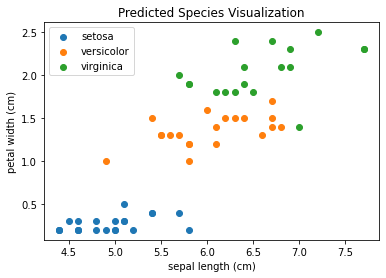

<Figure size 432x288 with 0 Axes>

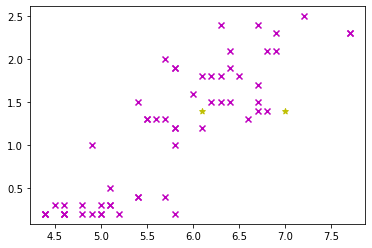

In [365]:
#Plot the data categorywise using scatter plot and visualize the data. Also include labels and legend.
# Write the code below
Check_Prediction = Check_Prediction.rename(columns = {'sepal length (cm)' : 'SepalLengthCm','petal width (cm)' : 'PetalWidthCm' })
plt.figure()
setosa1 = Check_Prediction[Check_Prediction['Prediction']==0]
versicolor1 = Check_Prediction[Check_Prediction['Prediction']==1]
virginica1 = Check_Prediction[Check_Prediction['Prediction']==2]
plt.scatter(setosa1['SepalLengthCm'], setosa1['PetalWidthCm'], label='setosa')
plt.scatter(versicolor1['SepalLengthCm'], versicolor1['PetalWidthCm'], label='versicolor')
plt.scatter(virginica1['SepalLengthCm'], virginica1['PetalWidthCm'], label='virginica')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.title('Predicted Species Visualization')
plt.show()
plt.clf()
plt.figure()
#Implement the below code snippet to see the values that were not predicted correctly
for index in Check_Prediction.index:
    if(Check_Prediction['Species_encoded'][index]==Check_Prediction['Prediction'][index]):
        plt.scatter(Check_Prediction['SepalLengthCm'][index],Check_Prediction['PetalWidthCm'][index],marker='x',c='m')
    else:
        plt.scatter(Check_Prediction['SepalLengthCm'][index],Check_Prediction['PetalWidthCm'][index],marker='*',c='y')

From this plot, it is visible that some of the outlier cases wrongly predicted in previous method are being taken care of by kNN. Still there could always be some errors near boundary lines.

Choosing an optimum value of k is very important. Let us see the problems when k is too large or too less.

First when k is too small :

Let us check for k = 1.

We are adding some outliers in the data to see what the KNN for k=1 predicts.

In [366]:
X_test=X_test.drop(['Species_encoded'],axis=1)

In [367]:
#adding outliers in the data
X_test.loc[len(X_test.index)] = [4.5, 1.5]  
X_test.loc[len(X_test.index)] = [4.8, 1.5]  
X_test.loc[len(X_test.index)] = [7, 1.5]  
X_test.loc[len(X_test.index)] = [5, 0.85]  
y_test.loc[len(y_test.index)] = [1] 
y_test.loc[len(y_test.index)] = [1]
y_test.loc[len(y_test.index)] = [2]
y_test.loc[len(y_test.index)] = [0] 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [368]:
# Now implement KNN algorithm with k = 1

In [369]:
start_time = time.time()
k = 1
y_predict = []
#Write the code below
def euclidean_distance(x_test, x_train):
    distance = 0
    for i in range(len(x_test)-1):
        distance += (x_test[i]-x_train[i])**2
    return sqrt(distance)

def get_neighbors(x_test, x_train, num_neighbors):
    distances = []
    data = []
    for i in x_train:
        distances.append(euclidean_distance(x_test,i))
        data.append(i)
    distances = np.array(distances)
    data = np.array(data)
    sort_indexes = distances.argsort()
    data = data[sort_indexes]
    return data[:num_neighbors]

def prediction(x_test, x_train, num_neighbors):
    classes = []
    neighbors = get_neighbors(x_test, x_train, num_neighbors)
    for i in neighbors:
        classes.append(i[-1])
    predicted = max(classes, key=classes.count) #taking the most repeated class
    return predicted
tr = X_train
ts = X_test
tr['Species_encoded'] = y_train['Species_encoded']
ts['Species_encoded'] = y_test['Species_encoded']
train = tr.values
test = ts.values
for i in test:
    y_predict.append(int(prediction(i, train, k)))

time_k1_NN = time.time() - start_time

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [370]:
# a):Concatenate X_test and y_test dataframe by column and assign it to the new dataframe 'Test_Data'
# b):Concatenate Test_data and Predicted dataframe by column assign it to the new dataframe 'Check_Prediction' 

In [371]:
# Write the code below
Test_data=X_test.reset_index()
y_predict = pd.DataFrame(y_predict,columns =['Prediction'])
Check_Prediction=pd.concat([Test_data,y_predict],axis=1)

We will calculate the accuracy now :

In [372]:
# Question 5) :Calculate the accuracy obtained for the algorithm used above
#             Assign the accuracy to ans[4] and store it as 'Accuracy_k2_NearestNeighbours'

In [373]:
#NOTE - Accuracy = Correct_Predictions/Total_Predictions
#Write the code below
correct=sum(Check_Prediction['Species_encoded']==Check_Prediction['Prediction'])
total=len(Check_Prediction['Species_encoded'])
Accuracy=correct/total
Accuracy_k2_NearestNeighbours=Accuracy
# 1 mark
ans[4] = Accuracy

As we can clearly see that KNN for k=1 doesn't do well in case of outliers. Hence, we increase the value of k to get better results.

Let us check for k = 2.

In [374]:
# Now implement KNN algorithm with k = 2

In [375]:
start_time = time.time()
k = 2
y_predict = []
#Write the code below
def euclidean_distance(x_test, x_train):
    distance = 0
    for i in range(len(x_test)-1):
        distance += (x_test[i]-x_train[i])**2
    return sqrt(distance)

def get_neighbors(x_test, x_train, num_neighbors):
    distances = []
    data = []
    for i in x_train:
        distances.append(euclidean_distance(x_test,i))
        data.append(i)
    distances = np.array(distances)
    data = np.array(data)
    sort_indexes = distances.argsort()
    data = data[sort_indexes]
    return data[:num_neighbors]

def prediction(x_test, x_train, num_neighbors):
    classes = []
    neighbors = get_neighbors(x_test, x_train, num_neighbors)
    for i in neighbors:
        classes.append(i[-1])
    predicted = max(classes, key=classes.count) #taking the most repeated class
    return predicted
tr = X_train
ts = X_test
train = tr.values
test = ts.values
for i in test:
    y_predict.append(int(prediction(i, train, k)))
time_k2_NN = time.time() - start_time

In [376]:
# a):Concatenate X_test and y_test dataframe by column and assign it to the new dataframe 'Test_Data'
# b):Concatenate Test_data and Predicted dataframe by column assign it to the new dataframe 'Check_Prediction' 

In [377]:
# Write the code below
Test_data=X_test.reset_index()
y_predict = pd.DataFrame(y_predict,columns =['Prediction'])
Check_Prediction=pd.concat([Test_data,y_predict],axis=1)

We will calculate the accuracy now :

In [378]:
# Question 6) :Calculate the accuracy obtained for the algorithm used above
#             Assign the accuracy to ans[5] and store it as 'Accuracy_k2_NearestNeighbours'

In [379]:
#NOTE - Accuracy = Correct_Predictions/Total_Predictions
#Write the code below
correct=sum(Check_Prediction['Species_encoded']==Check_Prediction['Prediction'])
total=len(Check_Prediction['Species_encoded'])
Accuracy=correct/total
Accuracy_k2_NearestNeighbours=Accuracy
# 1 mark
ans[5] = Accuracy

As we can see, when k is too small, it is better than Nearest Neighbour but __A__ accurate than k = 5.



In [380]:
#Question 7) What will come inplace of A 
#            Assign the answer to ans[6] for A 
# A = less or more? Write your response as "less" or "more" to the ans[6].
# Answer is case sensitive. Adhere to the choices given.

In [381]:
# 1 marks
ans[6] = "less"

Now let us see when k is large, for example k = 12 :

In [382]:
# Now implement KNN algorithm with k = 12

In [383]:
start_time = time.time()
k = 12
y_predict = []
#Write the code below
def euclidean_distance(x_test, x_train):
    distance = 0
    for i in range(len(x_test)-1):
        distance += (x_test[i]-x_train[i])**2
    return sqrt(distance)

def get_neighbors(x_test, x_train, num_neighbors):
    distances = []
    data = []
    for i in x_train:
        distances.append(euclidean_distance(x_test,i))
        data.append(i)
    distances = np.array(distances)
    data = np.array(data)
    sort_indexes = distances.argsort()
    data = data[sort_indexes]
    return data[:num_neighbors]

def prediction(x_test, x_train, num_neighbors):
    classes = []
    neighbors = get_neighbors(x_test, x_train, num_neighbors)
    for i in neighbors:
        classes.append(i[-1])
    predicted = max(classes, key=classes.count) #taking the most repeated class
    return predicted
tr = X_train
ts = X_test
train = tr.values
test = ts.values
for i in test:
    y_predict.append(int(prediction(i, train, k)))
time_k12_NN = time.time() - start_time

In [384]:
# a):Concatenate X_test and y_test dataframe by column and assign it to the new dataframe 'Test_Data'
# b):Concatenate Test_data and Predicted dataframe by column assign it to the new dataframe 'Check_Prediction'

In [385]:
#Write the code below
Test_data=X_test.reset_index()
y_predict = pd.DataFrame(y_predict,columns =['Prediction'])
Check_Prediction=pd.concat([Test_data,y_predict],axis=1)

We will calculate the accuracy now :

In [386]:
# Question 8) :Calculate the accuracy obtained for the algorithm used above
#              Assign the accuracy to ans[7] and store it as 'Accuracy_k12_NearestNeighbours'

In [387]:
#NOTE - Accuracy = Correct_Predictions/Total_Predictions
#Write the code below
correct=sum(Check_Prediction['Species_encoded']==Check_Prediction['Prediction'])
total=len(Check_Prediction['Species_encoded'])
Accuracy=correct/total
Accuracy_k12_NearestNeighbours=Accuracy
# 1 mark
ans[7] = Accuracy

We see that the accuracy is good but it is lower than when k = 5. This is because when the dataset is small and the value of k is too big, it looks at too many points in the surrounding and sometimes gets the wrong prediction about which class it belongs to.

**8) Nearest Mean Classification**

Here we take the mean for each of the classes and compare the test cases with them to reduce computational time.

In [388]:
setosa_PetalWidth = setosa['petal width (cm)'].mean() # Calculate the mean for all the features of all the classes
setosa_SepalLength = setosa['sepal length (cm)'].mean()

virginica_PetalWidth = virginica['petal width (cm)'].mean()
virginica_SepalLength = virginica['sepal length (cm)'].mean()

versicolor_PetalWidth = versicolor['petal width (cm)'].mean()
versicolor_SepalLength = versicolor['sepal length (cm)'].mean()

In [389]:
# Algorithm - Calculate the Euclidian distance for each test dataset by comparing with mean of every class
#            The predicited class is the minimum value obtained from all the Euclidian distance calculated for that test datapoint 

In [390]:
start_time = time.time()
y_predict = []
#Write the code below
SepalLength = [setosa_SepalLength,virginica_SepalLength,versicolor_SepalLength]
PetalWidth = [setosa_PetalWidth,virginica_PetalWidth,versicolor_PetalWidth]
Y_train_new = [0,1,2]
X_train_new = pd.DataFrame()
X_train_new['sepal length (cm)'] = SepalLength
X_train_new['petal width (cm)'] = PetalWidth
X_train_new['Species_encoded'] = Y_train_newk = 1
def euclidean_distance(x_test, x_train):
    distance = 0
    for i in range(len(x_test)-1):
        distance += (x_test[i]-x_train[i])**2
    return sqrt(distance)

def get_neighbors(x_test, x_train, num_neighbors):
    distances = []
    data = []
    for i in x_train:
        distances.append(euclidean_distance(x_test,i))
        data.append(i)
    distances = np.array(distances)
    data = np.array(data)
    sort_indexes = distances.argsort()
    data = data[sort_indexes]
    return data[:num_neighbors]

def prediction(x_test, x_train, num_neighbors):
    classes = []
    neighbors = get_neighbors(x_test, x_train, num_neighbors)
    for i in neighbors:
        classes.append(i[-1])
    predicted = max(classes, key=classes.count) #taking the most repeated class
    return predicted
tr = X_train_new
ts = X_test
#ts['Species_encoded'] = y_test['Species_encoded']
train = tr.values
test = ts.values
for i in test:
    y_predict.append(int(prediction(i, train, k)))

time_NM = time.time() - start_time

In [391]:
# a):Concatenate X_test and y_test dataframe by column and assign it to the new dataframe 'Test_Data'
# b):Concatenate Test_data and Predicted dataframe by column assign it to the new dataframe 'Check_Prediction'

In [392]:
#Write the code below
Test_data=X_test.reset_index()
y_predict = pd.DataFrame(y_predict,columns =['Prediction'])
Check_Prediction=pd.concat([Test_data,y_predict],axis=1)

We will calculate the accuracy now :

In [393]:
# Question 9) :Calculate the accuracy obtained for the algorithm used above
#              Assign the accuracy to ans[8] and store it as 'Accuracy_NearestMean'

In [394]:
#NOTE - Accuracy = Correct_Predictions/Total_Predictions
#Write the code below
correct=sum(Check_Prediction['Species_encoded']==Check_Prediction['Prediction'])
total=len(Check_Prediction['Species_encoded'])
Accuracy=correct/total
Accuracy_NearestMean=Accuracy
# 1 mark
ans[8] = Accuracy

Now let us have a look at the values that we did not predicted correctly :

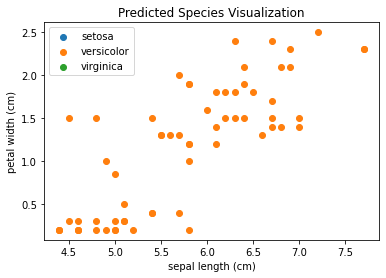

<Figure size 432x288 with 0 Axes>

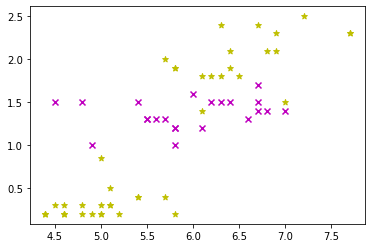

In [395]:
#Plot the data category wise using scatter plot and visualize the data. Also include labels and legend.
#Write the code below
Check_Prediction = Check_Prediction.rename(columns = {'sepal length (cm)' : 'SepalLengthCm','petal width (cm)' : 'PetalWidthCm' })
plt.figure()
setosa1 = Check_Prediction[Check_Prediction['Prediction']==0]
versicolor1 = Check_Prediction[Check_Prediction['Prediction']==1]
virginica1 = Check_Prediction[Check_Prediction['Prediction']==2]
plt.scatter(setosa1['SepalLengthCm'], setosa1['PetalWidthCm'], label='setosa')
plt.scatter(versicolor1['SepalLengthCm'], versicolor1['PetalWidthCm'], label='versicolor')
plt.scatter(virginica1['SepalLengthCm'], virginica1['PetalWidthCm'], label='virginica')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.title('Predicted Species Visualization')
plt.show()
plt.clf()
plt.figure()
#Implement the below code snippet to see the values that were not predicted correctly
for index in Check_Prediction.index:
    if(Check_Prediction['Species_encoded'][index]==Check_Prediction['Prediction'][index]):
        plt.scatter(Check_Prediction['SepalLengthCm'][index],Check_Prediction['PetalWidthCm'][index],marker='x',c='m')
    else:
        plt.scatter(Check_Prediction['SepalLengthCm'][index],Check_Prediction['PetalWidthCm'][index],marker='*',c='y')

We should only use this method if time complexity is really important to us as this method estimates the boundary just based on the mean which cannot be always relied on. Hence we see that as the mean of Green and Blue are close together, there are many wrong predictions in that region.

**9) Compare Results**

In [396]:
# Do not make changes in this cell
# Simply execute it and move on
print("ACCURACIES:\n")
print("Nearest Neighbours=",Accuracy_NearestNeighbours)
print("K Nearest Neighbours(k = 5) =",Accuracy_k5_NearestNeighbours)
print("K Nearest Neighbours(k = 2) =",Accuracy_k2_NearestNeighbours)
print("K Nearest Neighbours(k = 12) =",Accuracy_k12_NearestNeighbours)
print("Nearest Mean=",Accuracy_NearestMean)
print("=========================================================================")
print("TIMINGS:\n")
print("Nearest Neighbours=",time_NN)
print("K Nearest Neighbours(k = 5) =",time_k5_NN)
print("K Nearest Neighbours(k = 2) =",time_k2_NN)
print("K Nearest Neighbours(k = 12) =",time_k12_NN)
print("Nearest Mean=",time_NM)
print("=========================================================================")

ACCURACIES:

Nearest Neighbours= 0.9
K Nearest Neighbours(k = 5) = 0.9666666666666667
K Nearest Neighbours(k = 2) = 0.84375
K Nearest Neighbours(k = 12) = 0.9375
Nearest Mean= 0.34375
TIMINGS:

Nearest Neighbours= 0.02296757698059082
K Nearest Neighbours(k = 5) = 0.021732807159423828
K Nearest Neighbours(k = 2) = 0.022489547729492188
K Nearest Neighbours(k = 12) = 0.022112607955932617
Nearest Mean= 0.00608515739440918


On comparing the 3 timings of kNN, we see that the model with least k takes the __B__ time. It feels wrong but it does makes sense. I will explain why.

When k is low, the decision boundary changes a lot of times, ie there is a sudden change in the class in a small distance, while when k is large, the decision boundary is smoother and does not changes as often which helps when it comes to time complexity.

In [397]:
#Question 10) What will come inplace of B 
#            Assign the answer to ans[9] for B 
# B = highest or lowest? Write your response as "highest" or "lowest" to the ans[9].
# Answer is case sensitive. Adhere to the choices given.

In [398]:
# 1 marks
ans[9] = "highest"

On comparing the 3 plots, we can see that most of the errors occur at the boundary of 2 different classes. We reduce it slightly using the k nearest neighbours but not completely. 

Although Nearest mean has a significantly lower time than the other 2 processes, it is not a preffered method. It is because it has very low accuracy and it is very uncertain.

The most preffered algorithm is the k nearest neighbour algorithm as it gives very good accuracy as well as acceptable runtime.

**sklearn Library**

There is an inbuilt function to directly perform kNN from sklearn library.

In [399]:
# Do not make changes in the below cells
# Simply execute it and move on
X_train=X_train.drop(['Species_encoded'],axis=1)

In [400]:
# Import the library
X_test=X_test.drop(['Species_encoded'],axis=1)
from sklearn.neighbors import KNeighborsClassifier 

We will first do for k = 4

In [401]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train,y_train)
Predicted = neigh.predict(X_test)
print(Predicted)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 1 1 1 1 0 0 2 1 0 0 1
 0 2 1 2 1 0 0 2 1 0 1 2 1 0 0 2 1 1 0 2 0 2 1 1 1 1 1]


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


sklearn also has a funtion to calculate accuracy

In [402]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy = ",metrics.accuracy_score(y_test,Predicted))

Accuracy =  0.953125


In [403]:
# Run the this cell to submit your answers and get score evaluated"
# Do not make any changes in this cell
# Simply execute it and move on

ans = [item for item in ans]
with open('ans.json', 'w') as f:
    json.dump(ans, f)

In [404]:
! ../submit ans.json

{'accuracy': 0.4,
 'response': [{'obtained_marks': 0, 'question': 1, 'total_marks': 1},
              {'obtained_marks': 1, 'question': 2, 'total_marks': 1},
              {'obtained_marks': 0, 'question': 3, 'total_marks': 1},
              {'obtained_marks': 1, 'question': 4, 'total_marks': 1},
              {'obtained_marks': 0, 'question': 5, 'total_marks': 1},
              {'obtained_marks': 0, 'question': 6, 'total_marks': 1},
              {'obtained_marks': 1, 'question': 7, 'total_marks': 1},
              {'obtained_marks': 0, 'question': 8, 'total_marks': 1},
              {'obtained_marks': 0, 'question': 9, 'total_marks': 1},
              {'obtained_marks': 1, 'question': 10, 'total_marks': 1}],
 'status': 'Success'}


That is all for Tutorial 6.